In [1]:
from pygenomeviz import GenomeViz
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch, Circle, Rectangle
from matplotlib.path import Path
import numpy as np


In [2]:
data_dict = {}
with open("../results/processed_data/full_domains.txt","r") as domainfile:
    for line in domainfile.readlines():
        if line.startswith(">"):
            protein = line.split(">")[1].strip()
            if protein not in list(data_dict.keys()):
                data_dict[protein] = [[],[]]
        elif line.startswith("PFAM"):
            line = line.split("PFAM;")[-1]
            line = line.split("\t")
            start = line[0].split(":")[1]
            end = line[1].split(":")[1]
            name = line[2].split(":")[1].strip()
            
            pfam_entry = {"start":start,"end":end,"name":name}
            data_dict[protein][0].append(pfam_entry)
        elif line.startswith("OTHER"):
            line = line.split("OTHER;")[-1]
            line = line.split("\t")
            start = line[0].split(":")[1]
            end = line[1].split(":")[1]
            name = line[2].split(":")[1].strip()
            
            domain_entry = {"start":start,"end":end,"name":name}
            data_dict[protein][1].append(domain_entry)
        else:
            print(line)

In [3]:
data_dict

{'WP_087493643': [[{'start': '403', 'end': '461', 'name': 'PF22468'},
   {'start': '9', 'end': '299', 'name': 'PF00696'}],
  [{'start': '331', 'end': '397', 'name': 'G3DSA'},
   {'start': '401', 'end': '462', 'name': 'SSF55021'},
   {'start': '323', 'end': '407', 'name': 'SSF55021'},
   {'start': '9', 'end': '314', 'name': 'G3DSA'},
   {'start': '324', 'end': '461', 'name': 'G3DSA'},
   {'start': '11', 'end': '313', 'name': 'SSF53633'},
   {'start': '9', 'end': '462', 'name': 'PTHR21499'}]],
 'WP_087496890': [[{'start': '147', 'end': '360', 'name': 'PF02774'},
   {'start': '5', 'end': '122', 'name': 'PF01118'}],
  [{'start': '2', 'end': '374', 'name': 'MF_02121'},
   {'start': '5', 'end': '363', 'name': 'G3DSA'},
   {'start': '4', 'end': '123', 'name': 'SM00859'},
   {'start': '268', 'end': '282', 'name': 'PS01103'},
   {'start': '5', 'end': '148', 'name': 'SSF51735'},
   {'start': '135', 'end': '361', 'name': 'SSF55347'},
   {'start': '2', 'end': '376', 'name': 'PIRSF000148'},
   {'st

In [4]:
files = ["../results/processed_data/methionine_synthesis_proteins_curvibacter.faa",
         "../results/processed_data/methionine_synthesis_proteins_ecoli.faa",
        "../results/processed_data/methionine_synthesis_proteins_pseudomonas.faa"]

protein_sequences = {}
for file in files:
    
    with open(file,"r") as inputfile:
        for line in inputfile.readlines():
            if line.startswith(">"):
                header=line.split(">")[-1].strip()
                protein_sequences[header] = ""
            else:
                protein_sequences[header] += line.strip()

In [5]:
title_dict = {
    "WP_087493643":"LysC_curvi",
    "WP_087496890":"asd_curvi",
    "WP_087494180":"hom_curvi",
    "WP_087497334":"MetX_curvi",
    "WP_087493700":"MetC_curvi",
    "WP_087495570":"MetH_curvi",
    "WP_087494645":"MetE_curvi",
    "WP_087497000":"MetY_curvi",
    "WP_087494706":"MetZ_curvi",
    "WP_087495830":"MetW_curvi",
    "WP_087497263":"MetF_curvi",
    
    "NP_418448":"LysC_coli",
    "NP_417891":"asd_coli",
    "NP_417481":"MetC_coli",
    "NP_418443":"MetH_coli",
    "NP_418273":"MetE_coli",
    
    "NP_252425":"hom_pseudo",
    "NP_249081":"MetX_pseudo",
    "NP_251797":"MetZ_pseudo",
    "NP_253712":"MetY_pseudo",
    "WP_003084530.1":"MetW_pseudo",
}

In [6]:
meth = protein_sequences['WP_087495570']
meth_coli = protein_sequences["NP_418443"]
mete = protein_sequences["WP_087494645"]
mete_coli = protein_sequences["NP_418273"]

In [7]:
data_dict["WP_087495570"][0]

[{'start': '341', 'end': '417', 'name': 'PF02607'},
 {'start': '39', 'end': '277', 'name': 'PF00809'},
 {'start': '439', 'end': '532', 'name': 'PF02310'},
 {'start': '632', 'end': '906', 'name': 'PF02965'}]

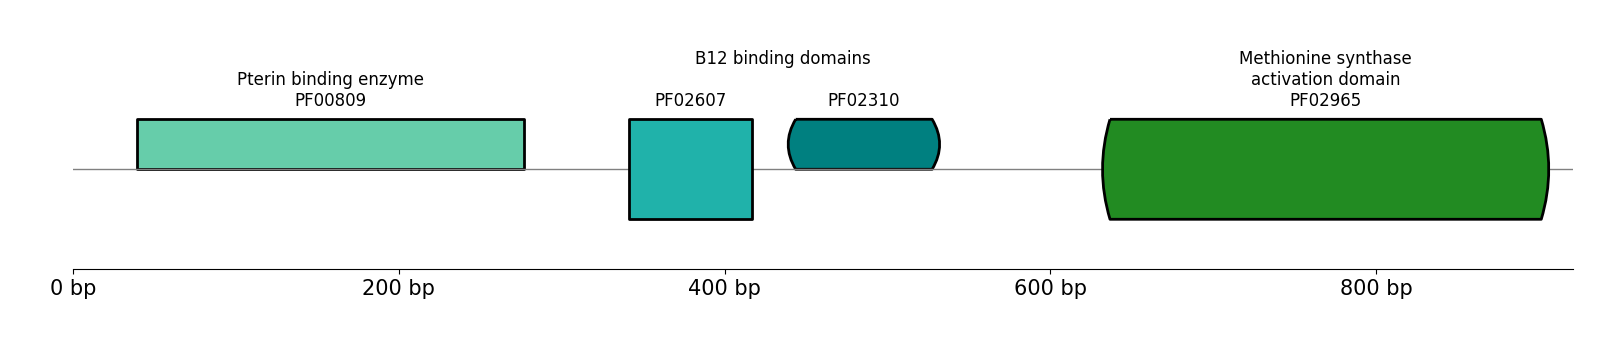

In [120]:
#PLOTSTYLE2PATCH = dict(
#    arrow=Arrow,
#    bigarrow=BigArrow,
#    box=Box,
#    bigbox=BigBox,
#    rbox=RoundBox,
#    bigrbox=BigRoundBox,
#)

gv = GenomeViz()
#gv.set_scale_bar(ymargin=0.5)

gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("", (0, len(meth)))
#track.add_sublabel()
track.add_feature(39, 277, 1, plotstyle="box", label="Pterin binding enzyme\nPF00809",
                  fc="mediumaquamarine", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(341, 417, 1, plotstyle="bigbox", label="PF02607",
                  fc="lightseagreen", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(int(((341+531)/2)-1), int(((341+531)/2)+1),fc="white", label="B12 binding domains\n\n",
                  text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(439, 532, 1, plotstyle="rbox", label="PF02310",
                  fc="teal",lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(632, 906, 1, plotstyle="bigrbox", label="Methionine synthase\nactivation domain\nPF02965", fc="#228B22", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))

gv.plotfig()
gv.savefig("../results/figures/meth_locus_curvibacter.svg")

In [111]:
data_dict["WP_087494645"][0]

[{'start': '2', 'end': '329', 'name': 'PF01717'}]

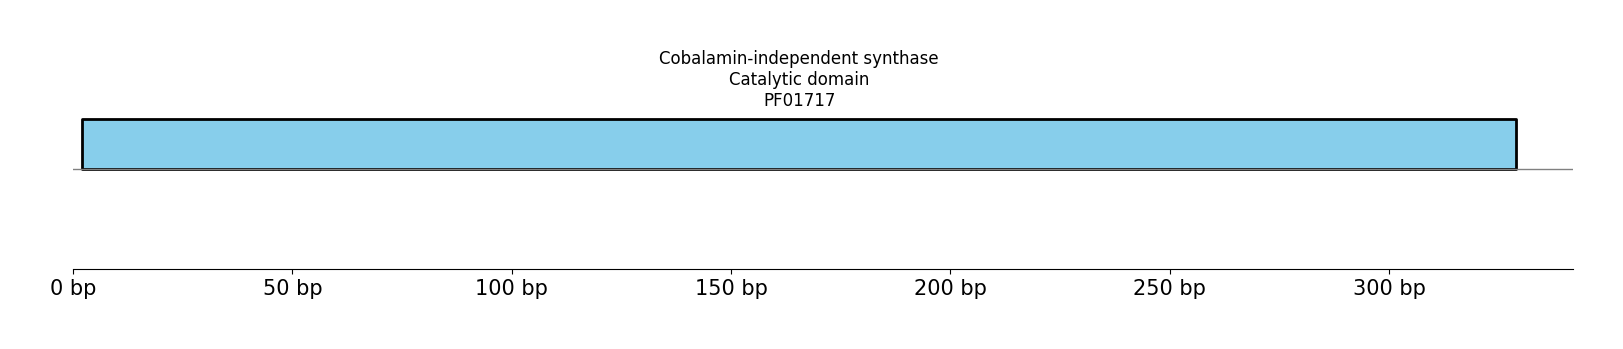

In [119]:
#PLOTSTYLE2PATCH = dict(
#    arrow=Arrow,
#    bigarrow=BigArrow,
#    box=Box,
#    bigbox=BigBox,
#    rbox=RoundBox,
#    bigrbox=BigRoundBox,
#)

gv = GenomeViz()
#gv.set_scale_bar(ymargin=0.5)

gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("", (0, len(mete)))
#track.add_sublabel()
track.add_feature(2, 329, 1, plotstyle="box", label="Cobalamin-independent synthase\nCatalytic domain\nPF01717",
                  fc="skyblue", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))

gv.plotfig()
gv.savefig("../results/figures/mete_locus_curvibacter.svg")

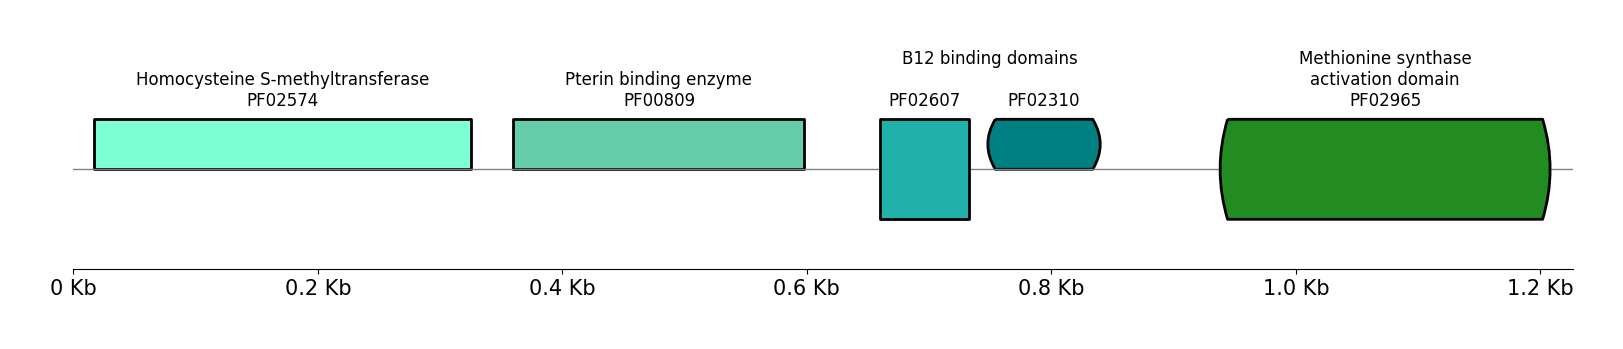

In [118]:
gv = GenomeViz()
#gv.set_scale_bar(ymargin=0.5)

gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("", (0, len(meth_coli)))
#track.add_sublabel()
track.add_feature(17, 325, 1, plotstyle="box", label="Homocysteine S-methyltransferase\nPF02574",
                  fc="aquamarine", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(360, 598, 1, plotstyle="box", label="Pterin binding enzyme\nPF00809",
                  fc="mediumaquamarine", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(660, 733, 1, plotstyle="bigbox", label="PF02607",
                  fc="lightseagreen", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(int(((660+840)/2)-1), int(((660+840)/2)+1),fc="white", label="B12 binding domains\n\n",
                  text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(748, 840, 1, plotstyle="rbox", label="PF02310",
                  fc="teal",lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(938, 1208, 1, plotstyle="bigrbox", label="Methionine synthase\nactivation domain\nPF02965", fc="#228B22", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))

gv.plotfig()
gv.savefig("../results/figures/meth_locus_ecoli.svg")

In [114]:
data_dict["NP_418273"][0]

[{'start': '426', 'end': '749', 'name': 'PF01717'},
 {'start': '5', 'end': '312', 'name': 'PF08267'}]

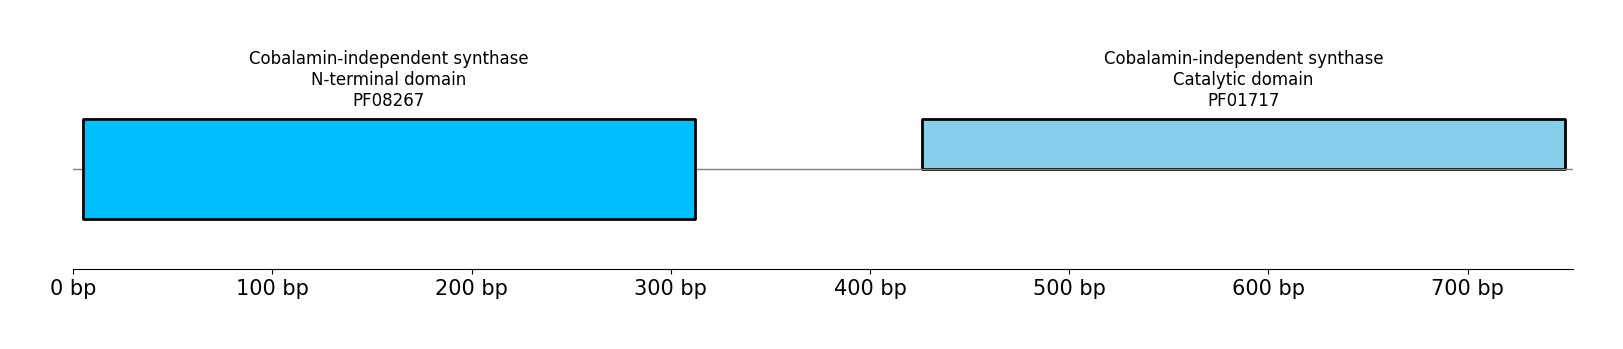

In [117]:
gv = GenomeViz()
#gv.set_scale_bar(ymargin=0.5)

gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("", (0, len(mete_coli)))
#track.add_sublabel()
track.add_feature(5, 312, 1, plotstyle="bigbox", label="Cobalamin-independent synthase\nN-terminal domain\nPF08267",
                  fc="deepskyblue", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(426, 749, 1, plotstyle="box", label="Cobalamin-independent synthase\nCatalytic domain\nPF01717",
                  fc="skyblue", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
gv.plotfig()
gv.savefig("../results/figures/mete_locus_ecoli.svg")

In [28]:
gv = GenomeViz(fig_width=10, feature_track_ratio=1.0)


gv.set_scale_xticks(ymargin=0.3)

track = gv.add_feature_track("", (0, len(meth)))
track.add_feature(39, 277, 1, plotstyle="box", label="Pterin binding enzyme\nPF00809",
                  fc="mediumaquamarine", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(341, 417, 1, plotstyle="bigbox", label="PF02607",
                  fc="lightseagreen", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(int(((341+531)/2)-1), int(((341+531)/2)+1),fc="white", label="B12 binding domains\n\n",
                  text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(439, 532, 1, plotstyle="rbox", label="PF02310",
                  fc="teal",lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track.add_feature(632, 906, 1, plotstyle="bigrbox", label="Methionine synthase\nactivation domain\nPF02965", fc="#228B22", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))

track_eco = gv.add_feature_track(" ", (0, len(meth_coli)))
track_eco.add_feature(17, 325, 1, plotstyle="box", label="Homocysteine S-methyltransferase\nPF02574",
                  fc="aquamarine", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track_eco.add_feature(360, 598, 1, plotstyle="box", label="Pterin binding enzyme\nPF00809",
                  fc="mediumaquamarine", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track_eco.add_feature(660, 733, 1, plotstyle="bigbox", label="PF02607",
                  fc="lightseagreen", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track_eco.add_feature(int(((660+840)/2)-1), int(((660+840)/2)+1),fc="white", label="B12 binding domains\n\n",
                  text_kws=dict(size=12, rotation=0, hpos="center"))
track_eco.add_feature(748, 840, 1, plotstyle="rbox", label="PF02310",
                  fc="teal",lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))
track_eco.add_feature(938, 1208, 1, plotstyle="bigrbox", label="Methionine synthase\nactivation domain\nPF02965", fc="#228B22", lw=2, text_kws=dict(size=12, rotation=0, hpos="center"))


#gv.plotfig()
gv.savefig("../results/figures/domains/meth_combined.svg")

In [29]:
gv = GenomeViz(fig_width=10, feature_track_ratio=1.0)


gv.set_scale_xticks(ymargin=0.3)
track_curvi_mete = gv.add_feature_track("", (0, len(mete)))
#track.add_sublabel()
track_curvi_mete.add_feature(2, 329, 1, plotstyle="box", label="Cobalamin-independent synthase\nCatalytic domain\nPF01717",
                  fc="skyblue", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track_coli_mete = gv.add_feature_track(" ", (0, len(mete_coli)))
#track.add_sublabel()
track_coli_mete.add_feature(5, 312, 1, plotstyle="bigbox", label="Cobalamin-independent synthase\nN-terminal domain\nPF08267",
                  fc="deepskyblue", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))
track_coli_mete.add_feature(426, 749, 1, plotstyle="box", label="Cobalamin-independent synthase\nCatalytic domain\nPF01717",
                  fc="skyblue", lw=2,text_kws=dict(size=12, rotation=0, hpos="center"))

gv.savefig("../results/figures/domains/mete_combined.svg")